# Generate Images using DCGAN Generator

## Import Relevant Packages and Classes

In [1]:
import torch
import torch.nn as nn
import numpy as np


class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)
# modelD = torch.load("model_5000_40D.pth")
# modelG = torch.load("model_5000_40G.pth")

In [2]:
nz = 100
ngpu = 1
# generate random noise for input
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

In [3]:
# This is what is used in the dcgan_model.ipynb file

# Number of workers for dataloader
workers = 0

# Batch size during training
batch_size = 64

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 1

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1


subset_size = 10000

## Load Models

In [5]:
nz=100
modelG = Generator(1).to(device)
modelD = Discriminator(1).to(device)

# NOTE currently the lower code adds CPU. this is because im loading rn w/o GPU access. otherwise use version directly below
# gen.load_state_dict(torch.load('/content/drive/MyDrive/Pic 16B/CAN/CAN_gen_epoch_12.pt')["model_state_dict"]) # currently set to 12
# disc.load_state_dict(torch.load('/content/drive/MyDrive/Pic 16B/CAN/CAN_disc_epoch_12.pt')["model_state_dict"])
modelG.load_state_dict(torch.load('5000/DCGAN_gen_epoch_5000_44.pt',
                               map_location=torch.device('cpu'))["model_state_dict"]) # currently set to 12
modelD.load_state_dict(torch.load('5000/DCGAN_disc_epoch_5000_44.pt',
                                map_location=torch.device('cpu'))["model_state_dict"])
print("Generator and discriminator models loaded")


Generator and discriminator models loaded


## Generate Batch of Fake Images

In [6]:
nz = 100
ngpu = 1
# generate random noise for input
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
fixed_noise = torch.randn(64, nz, 1, 1, device=device)
# generate fake img batch
fake_img = modelG(fixed_noise)

## Plot Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


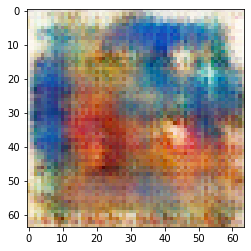

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)
ax.imshow(np.transpose(fake_img[0].detach(),(1,2,0)))

## Save Images

In [11]:
import numpy as np
from torchvision.utils import save_image
iters = 0
num_images = 1000
num_batches = num_images // 64
print(num_batches)
for j in range(num_batches):
    fixed_noise = torch.randn(64, nz, 1, 1, device=device)
    fake_img = modelG(fixed_noise)
    for i in range(64):
        title = "fake_images/fake_img_" + str(iters) + ".png"
        save_image(fake_img[i], title)
        iters+=1


15
